In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer#tfidfvectorizer is used to convert the textual data into numerical data
from sklearn.metrics.pairwise import cosine_similarity#it is helpful to know the similarity between different prodt.
from sklearn.metrics.pairwise import linear_kernel
import difflib


In [ ]:
df=pd.read_csv(r"C:\Users\LENOVO\Downloads\export_skincare.csv")

In [ ]:
df

,Unnamed: 0,product_href,product_name,product_type,brand,notable_effects,skintype,price,description,picture_src,labels,Sensitive,Combination,Oily,Dry,Normal
0,0,https://www.beautyhaul.com/product/detail/bubb...,ACWELL Bubble Free PH Balancing Cleanser,Face Wash,ACWELL,"Acne-Free, Pore-Care, Brightening, Anti-Aging",Oily,Rp 209.000,Mengangkat kotoran dan menghapus makeup dalam ...,https://www.beautyhaul.com/assets/uploads/prod...,18,0,0,1,0,0
1,1,https://www.sociolla.com/face-wash/62452-ph-ba...,ACWELL pH Balancing Soothing Cleansing Foam,Face Wash,ACWELL,"Soothing, Balancing","Normal, Dry, Combination",Rp 181.800,Membersihkan dan menenangkan kulit sensitif de...,https://images.soco.id/8f08ced0-344d-41f4-a15e...,127,0,1,0,1,1
2,2,https://www.sociolla.com/toner/15871-licorice-...,Acwell Licorice pH Balancing Cleansing Toner,Toner,ACWELL,"Soothing, Balancing","Normal, Dry, Oily, Combination, Sensitive",Rp 149.000,"Mengangkat sisa kotoran, debu, dan make up sek...","https://www.soco.id/cdn-cgi/image/w=73,format=...",127,1,1,1,1,1
3,3,https://www.beautyhaul.com/product/detail/aqua...,ACWELL Aquaseal Soothing Tonic,Toner,ACWELL,"Acne-Free, Pore-Care, Brightening, Anti-Aging",Oily,Rp 290.000,Pre-essence yang diformulasikan dengan ekstrak...,https://www.beautyhaul.com/assets/uploads/prod...,18,0,0,1,0,0
4,4,https://www.sociolla.com/essence/38023-licoric...,Licorice pH Balancing Essence Mist,Toner,ACWELL,"Brightening, Soothing","Normal, Dry",Rp 194.650,Essens mist dengan kelembapan tinggi yang memb...,"https://www.sociolla.com/cdn-cgi/image/w=425,f...",40,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1205,1219,https://www.sociolla.com/face-cream-lotion/263...,Whitelab Brightening Day Cream,Moisturizer,WHITELAB,"Brightening, UV-Protection","Normal, Dry, Oily, Combination, Sensitive",Rp 61.950,Whitelab Brightening Day Cream Fungsi: - Memba...,"https://www.soco.id/cdn-cgi/image/w=73,format=...",41,1,1,1,1,1
1206,1220,https://shopee.co.id/YOU-The-Radiance-White-Pu...,YOU The Radiance White Purifying Facial Foam,Face Wash,YOU,"Moisturizing, Refreshing","Normal, Dry, Oily, Sensitive",Rp 52.000,YOU The Radiance White Purifying Facial Foam [...,https://cdn.istyle.im/images/product/web/27/61...,97,1,0,1,1,1
1207,1221,https://shopee.co.id/YOU-Basic-Skin-Care-Simpl...,YOU Basic Skin Care Simply Fresh and Bright Fa...,Face Wash,YOU,"Refreshing, Acne-Free","Normal, Dry, Oily, Sensitive",Rp 25.000,YOU Simply Fresh Honey and lemon Facial Wash S...,https://images.tokopedia.net/img/cache/700/pro...,114,1,0,1,1,1
1208,1222,https://shopee.co.id/YOU-Dazzling-Glow-Up-Faci...,YOU Dazzling Glow Up Facial Foam,Face Wash,YOU,"Hydrating, Moisturizing","Normal, Dry, Oily, Sensitive",Rp 35.000,"A mild facial foam with Rice Extract, Tranexam...",https://images.tokopedia.net/img/cache/700/Vqb...,54,1,0,1,1,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1210 entries, 0 to 1209
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       1210 non-null   int64 
 1   product_href     1210 non-null   object
 2   product_name     1210 non-null   object
 3   product_type     1210 non-null   object
 4   brand            1210 non-null   object
 5   notable_effects  1210 non-null   object
 6   skintype         1210 non-null   object
 7   price            1210 non-null   object
 8   description      1210 non-null   object
 9   picture_src      1210 non-null   object
 10  labels           1210 non-null   int64 
 11  Sensitive        1210 non-null   int64 
 12  Combination      1210 non-null   int64 
 13  Oily             1210 non-null   int64 
 14  Dry              1210 non-null   int64 
 15  Normal           1210 non-null   int64 
dtypes: int64(7), object(9)
memory usage: 151.4+ KB


In [11]:
df.describe()

,Unnamed: 0,labels,Sensitive,Combination,Oily,Dry,Normal
count,1210.000000,1210.000000,1210.000000,1210.000000,1210.000000,1210.000000,1210.000000
mean,607.697521,70.136364,0.404959,0.359504,0.685950,0.598347,0.439669
std,353.278764,44.945556,0.491087,0.480054,0.464328,0.490435,0.496552
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,302.250000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,605.500000,71.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,909.750000,108.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1223.000000,150.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
df.head()

,Unnamed: 0,product_href,product_name,product_type,brand,notable_effects,skintype,price,description,picture_src,labels,Sensitive,Combination,Oily,Dry,Normal
0,0,https://www.beautyhaul.com/product/detail/bubb...,ACWELL Bubble Free PH Balancing Cleanser,Face Wash,ACWELL,"Acne-Free, Pore-Care, Brightening, Anti-Aging",Oily,Rp 209.000,Mengangkat kotoran dan menghapus makeup dalam ...,https://www.beautyhaul.com/assets/uploads/prod...,18,0,0,1,0,0
1,1,https://www.sociolla.com/face-wash/62452-ph-ba...,ACWELL pH Balancing Soothing Cleansing Foam,Face Wash,ACWELL,"Soothing, Balancing","Normal, Dry, Combination",Rp 181.800,Membersihkan dan menenangkan kulit sensitif de...,https://images.soco.id/8f08ced0-344d-41f4-a15e...,127,0,1,0,1,1
2,2,https://www.sociolla.com/toner/15871-licorice-...,Acwell Licorice pH Balancing Cleansing Toner,Toner,ACWELL,"Soothing, Balancing","Normal, Dry, Oily, Combination, Sensitive",Rp 149.000,"Mengangkat sisa kotoran, debu, dan make up sek...","https://www.soco.id/cdn-cgi/image/w=73,format=...",127,1,1,1,1,1
3,3,https://www.beautyhaul.com/product/detail/aqua...,ACWELL Aquaseal Soothing Tonic,Toner,ACWELL,"Acne-Free, Pore-Care, Brightening, Anti-Aging",Oily,Rp 290.000,Pre-essence yang diformulasikan dengan ekstrak...,https://www.beautyhaul.com/assets/uploads/prod...,18,0,0,1,0,0
4,4,https://www.sociolla.com/essence/38023-licoric...,Licorice pH Balancing Essence Mist,Toner,ACWELL,"Brightening, Soothing","Normal, Dry",Rp 194.650,Essens mist dengan kelembapan tinggi yang memb...,"https://www.sociolla.com/cdn-cgi/image/w=425,f...",40,0,0,0,1,1


In [15]:
df.tail()

,Unnamed: 0,product_href,product_name,product_type,brand,notable_effects,skintype,price,description,picture_src,labels,Sensitive,Combination,Oily,Dry,Normal
1205,1219,https://www.sociolla.com/face-cream-lotion/263...,Whitelab Brightening Day Cream,Moisturizer,WHITELAB,"Brightening, UV-Protection","Normal, Dry, Oily, Combination, Sensitive",Rp 61.950,Whitelab Brightening Day Cream Fungsi: - Memba...,"https://www.soco.id/cdn-cgi/image/w=73,format=...",41,1,1,1,1,1
1206,1220,https://shopee.co.id/YOU-The-Radiance-White-Pu...,YOU The Radiance White Purifying Facial Foam,Face Wash,YOU,"Moisturizing, Refreshing","Normal, Dry, Oily, Sensitive",Rp 52.000,YOU The Radiance White Purifying Facial Foam [...,https://cdn.istyle.im/images/product/web/27/61...,97,1,0,1,1,1
1207,1221,https://shopee.co.id/YOU-Basic-Skin-Care-Simpl...,YOU Basic Skin Care Simply Fresh and Bright Fa...,Face Wash,YOU,"Refreshing, Acne-Free","Normal, Dry, Oily, Sensitive",Rp 25.000,YOU Simply Fresh Honey and lemon Facial Wash S...,https://images.tokopedia.net/img/cache/700/pro...,114,1,0,1,1,1
1208,1222,https://shopee.co.id/YOU-Dazzling-Glow-Up-Faci...,YOU Dazzling Glow Up Facial Foam,Face Wash,YOU,"Hydrating, Moisturizing","Normal, Dry, Oily, Sensitive",Rp 35.000,"A mild facial foam with Rice Extract, Tranexam...",https://images.tokopedia.net/img/cache/700/Vqb...,54,1,0,1,1,1
1209,1223,https://shopee.co.id/YOU-Golden-Age-Deep-Clean...,YOU Golden Age Deep Cleansing Facial Wash,Face Wash,YOU,"Pore-Care, Brightening, Anti-Aging","Normal, Dry, Oily, Sensitive",Rp 55.000,Golden Age Deep Cleansing Facial Wash diformul...,http://image.femaledaily.com/dyn/640/images/pr...,108,1,0,1,1,1


In [32]:
list1=df[['Normal','Sensitive','Combination','Oily','Dry']].sum()


In [34]:
list1  #this gives the total no.of people with the type of skin they have basically a data which helps us to know the total no.people with the skin type like max ,min etc.

Normal         532
Sensitive      490
Combination    435
Oily           830
Dry            724
dtype: int64

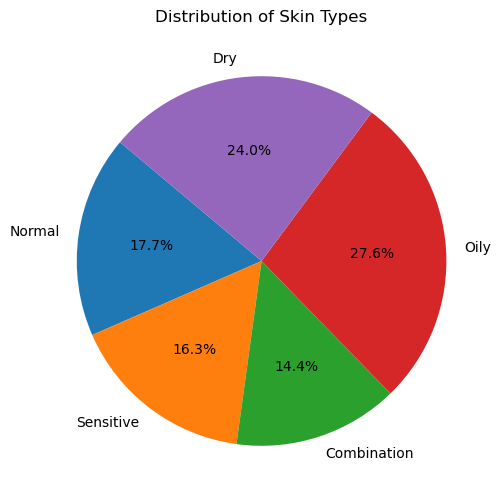

In [36]:
plt.figure(figsize=(10,6))
plt.pie(list1,labels=list1.index ,autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Skin Types')
plt.show()
#this figure interprets that most of the people have oily skin with a total per of 27.6% and about 16.3% have sensitive skin .
#it's a visual interpretation of the skin type .

In [46]:
selected_title=['product_name','product_type',	'brand','notable_effects']
print(selected_title)

['product_name', 'product_type', 'brand', 'notable_effects']


In [175]:
combined_features=df['skintype']+' '+df['product_type']+' '+df['brand']+' '+df['notable_effects']


In [177]:
combined_features

0       Oily Face Wash ACWELL  Acne-Free, Pore-Care, B...
1       Normal, Dry, Combination Face Wash ACWELL  Soo...
2       Normal, Dry, Oily, Combination, Sensitive Tone...
3       Oily Toner ACWELL  Acne-Free, Pore-Care, Brigh...
4         Normal, Dry Toner ACWELL  Brightening, Soothing
                              ...                        
1205    Normal, Dry, Oily, Combination, Sensitive Mois...
1206    Normal, Dry, Oily, Sensitive Face Wash YOU Moi...
1207    Normal, Dry, Oily, Sensitive Face Wash YOU Ref...
1208    Normal, Dry, Oily, Sensitive Face Wash YOU Hyd...
1209    Normal, Dry, Oily, Sensitive Face Wash YOU Por...
Length: 1210, dtype: object

In [179]:
vectorizer= TfidfVectorizer()
feature_vector=vectorizer.fit_transform(combined_features)

In [181]:
print(feature_vector)

  (0, 2)	0.2060642171932719
  (0, 7)	0.2060642171932719
  (0, 37)	0.20278985500330998
  (0, 40)	0.23456971223433662
  (0, 166)	0.23456971223433662
  (0, 73)	0.2834218947558836
  (0, 0)	0.2829683436781746
  (0, 1)	0.6357504855375046
  (0, 228)	0.30010250973722746
  (0, 70)	0.2954296614301314
  (0, 157)	0.14828188251409405
  (1, 14)	0.44090419376717616
  (1, 205)	0.304681365445141
  (1, 45)	0.22069009824865246
  (1, 55)	0.16517483600869323
  (1, 152)	0.19876047107413902
  (1, 1)	0.6443084759771992
  (1, 228)	0.3041422619162418
  (1, 70)	0.2994065112723831
  (2, 218)	0.28477218322540643
  (2, 190)	0.21183171693843036
  (2, 14)	0.44963015237850273
  (2, 205)	0.3107113307348808
  (2, 45)	0.22505778785213182
  (2, 55)	0.16844382007148853
  :	:
  (1207, 0)	0.25232209572884573
  (1207, 228)	0.2676005845957958
  (1207, 70)	0.2634338185804056
  (1207, 157)	0.1322225478236791
  (1208, 232)	0.7137420039993426
  (1208, 98)	0.32085665394748525
  (1208, 139)	0.26126950481307754
  (1208, 190)	0.209264

In [183]:
similarity=cosine_similarity(feature_vector)
similarity

array([[1.        , 0.58934685, 0.44045074, ..., 0.32076738, 0.2035124 ,
        0.42879488],
       [0.58934685, 1.        , 0.8340394 , ..., 0.21902649, 0.25078549,
        0.24189014],
       [0.44045074, 0.8340394 , 1.        , ..., 0.11890559, 0.13614698,
        0.13131786],
       ...,
       [0.32076738, 0.21902649, 0.11890559, ..., 1.        , 0.72383296,
        0.69815865],
       [0.2035124 , 0.25078549, 0.13614698, ..., 0.72383296, 1.        ,
        0.79939215],
       [0.42879488, 0.24189014, 0.13131786, ..., 0.69815865, 0.79939215,
        1.        ]])

In [58]:
print(similarity.shape)

(1210, 1210)


In [229]:
tfidf=TfidfVectorizer()
tfidf_matrix=tfidf.fit_transform(df['skintype'])

In [231]:
print(tfidf_matrix)

  (0, 3)	1.0
  (1, 0)	0.6493903396379143
  (1, 1)	0.48603423400749257
  (1, 2)	0.584861445265205
  (2, 4)	0.48794629690932195
  (2, 0)	0.5184120478283709
  (2, 1)	0.3880039279719014
  (2, 2)	0.46689825984299804
  (2, 3)	0.35301037779763705
  (3, 3)	1.0
  (4, 1)	0.6391358784149319
  (4, 2)	0.7690938362272666
  (5, 0)	0.5939141902023143
  (5, 1)	0.4445132778878633
  (5, 2)	0.5348978733482829
  (5, 3)	0.4044232257736946
  (6, 4)	0.48794629690932195
  (6, 0)	0.5184120478283709
  (6, 1)	0.3880039279719014
  (6, 2)	0.46689825984299804
  (6, 3)	0.35301037779763705
  (7, 0)	0.6493903396379143
  (7, 1)	0.48603423400749257
  (7, 2)	0.584861445265205
  (8, 3)	1.0
  :	:
  (1204, 0)	0.5184120478283709
  (1204, 1)	0.3880039279719014
  (1204, 2)	0.46689825984299804
  (1204, 3)	0.35301037779763705
  (1205, 4)	0.48794629690932195
  (1205, 0)	0.5184120478283709
  (1205, 1)	0.3880039279719014
  (1205, 2)	0.46689825984299804
  (1205, 3)	0.35301037779763705
  (1206, 4)	0.5706100271165245
  (1206, 1)	0.4537

In [254]:
skin_type=input("enter the skin type of yours:")

#here you can take inputs according to tour choice 

enter the skin type of yours: dry,oily


In [256]:
user_feature_vector=tfidf.transform([skin_type])
cosine_similarities=linear_kernel(user_feature_vector,tfidf_matrix).flatten()
#cosine similarity will provide you the similarity and it will recommend accordingly 

In [258]:
top_indices=cosine_similarities.argsort()[::-1][:30]
recommended_products=df.iloc[top_indices]

In [270]:
print("recommended products for ",skin_type,"skin are:")

print(recommended_products[['product_name']])
print(recommended_products[['product_href']])

recommended products for  dry,oily skin are:
                                           product_name
780             OMNISKIN Watermelon Plump Infused Toner
209   CETAPHIL Daily Facial Moisturizer SPF15 PA++ 1...
467                              HEIMISH Refresh Water 
938                SKIN AQUA UV Moisture Gel SPF30 PA++
214     CLINIQUE Dramatically Different Hydrating JELLY
215                     COSRX One Step Moisture Up Pad 
942                    SKIN DEWI Calming Dew Rose Toner
944         SKINMEE Calmee Fresh Calming Soothing Serum
234   DEAR ME BEAUTY Single Active Face Serum 10% La...
238    DEAR ME BEAUTY Single Active Face Serum 10% C...
241   DEAR ME BEAUTY Single Active Face Serum 8% Sna...
948                           SKIN GAME Skin Barricade 
244   DEAR ME BEAUTY Single Active Face Serum 10% Vi...
246   DEAR ME BEAUTY Single Active Face Serum Hyalur...
447                     HAPLE La Luna Anti-Aging Serum 
248   DEAR ME BEAUTY Single Active Face Serum 1% Bak...
444